In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper.....
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
measurement= base.classes.measurement
station = base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date


'2017-08-23'

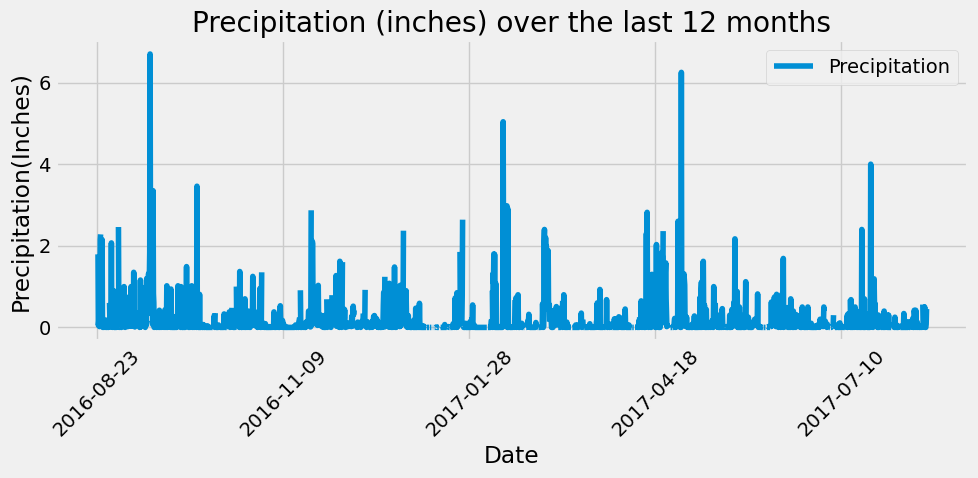

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.date <= most_recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
set_col_df = pd.DataFrame(query_results, columns=[ 'Date', 'Precipitation'])
# Sort the dataframe by date
set_col_df = set_col_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

set_col_df.plot(x='Date', y='Precipitation', kind='line', figsize=(10,5), rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation(Inches)')
plt.title('Precipitation (inches) over the last 12 months')
plt.tight_layout()
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
set_col_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(station.id)).all()

print(total_station)

[(9,)]


In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0] 
temperature_stats = session.query(func.min(measurement.tobs),
                                  func.max(measurement.tobs),
                                  func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()
print(most_active_station, temperature_stats)


USC00519281 [(54.0, 85.0, 71.66378066378067)]


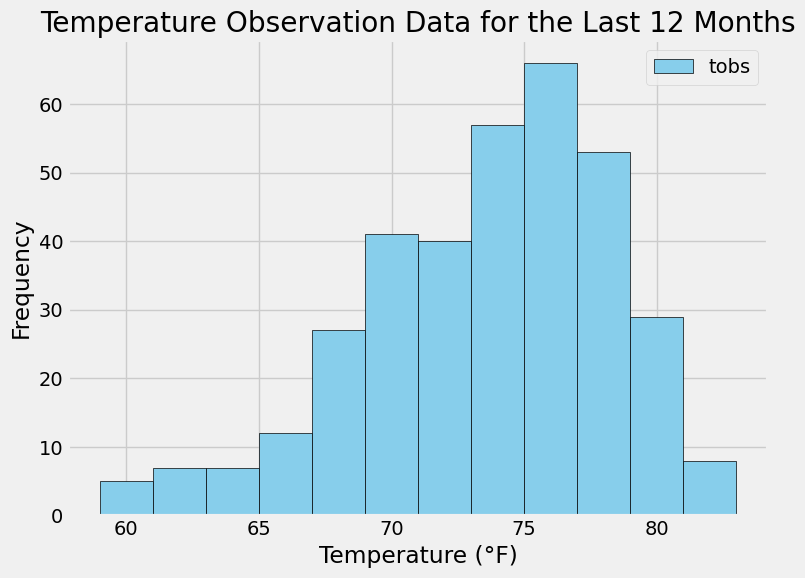

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date = session.query(func.max(measurement.date)).scalar()

temperature_data = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.date <= most_recent_date).all()

most_active_data = pd.DataFrame(temperature_data, columns=['date','Temperature'])


import matplotlib.pyplot as plt

# Plot the temperature observations as a histogram
plt.figure(figsize=(8, 6))
plt.hist(most_active_data['Temperature'], bins=12, color='skyblue', edgecolor='black')
plt.title('Temperature Observation Data for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()

plt.show()



# Close Session

In [35]:
# Close Session
session.close()